# Data Analytics 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
ads = pd.read_csv("Social_Network_Ads.csv")
ads

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
ads.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
ads.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
ads.rename(columns={'Purchased':'Purchased_Status'},inplace=True)
ads

,User ID,Gender,Age,EstimatedSalary,Purchased_Status
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [6]:
#for changing Gender categorical to continous/numerical without using library
#to perform Linear Regression or Logistic Regression the independent variables must be continous
ads1=ads
ads1['Gender']=ads1['Gender'].replace({'Male':1,"Female":0})
ads1

,User ID,Gender,Age,EstimatedSalary,Purchased_Status
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [7]:
#now using sklearn.preprocessing library
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ads['Gender']=le.fit_transform(ads['Gender'])
ads

,User ID,Gender,Age,EstimatedSalary,Purchased_Status
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [8]:
ads.dtypes

User ID             int64
Gender              int64
Age                 int64
EstimatedSalary     int64
Purchased_Status    int64
dtype: object

In [9]:
predictors=ads.iloc[:,1:4]   # Considered as X
predictors

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [10]:
target=ads.iloc[:,4]       #considered as y
target

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased_Status, Length: 400, dtype: int64

In [11]:
#visualize the Data to get insights from the data
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

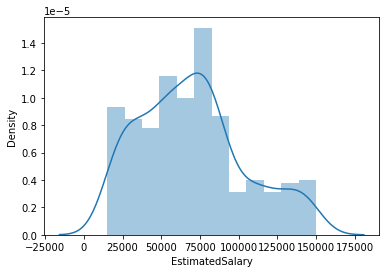

In [12]:
sns.distplot(ads['EstimatedSalary'])

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

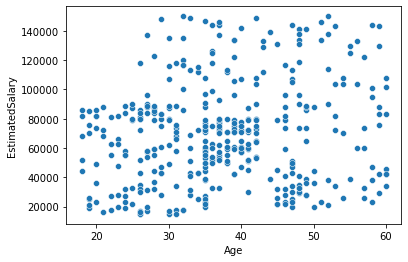

In [13]:
sns.scatterplot(x='Age',y='EstimatedSalary',data=ads)

<AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>

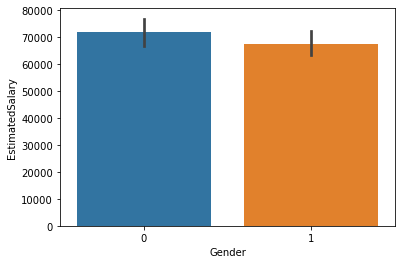

In [14]:
sns.barplot(x='Gender',y='EstimatedSalary',data=ads)

<AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>

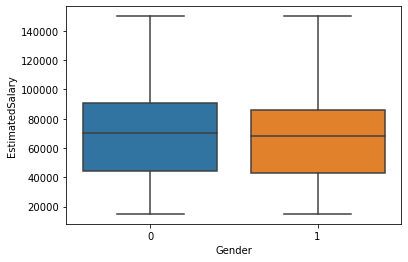

In [15]:
sns.boxplot(x='Gender',y='EstimatedSalary',data=ads)

In [16]:
#Based on this visualizations it seems that there are no outliers in the dataset so we are good to go for preprocessing
# splitting data into training and testing datasets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(predictors,target,test_size=0.3,random_state=4)
print(X_train.shape)
X_train.head()

(280, 3)


,Gender,Age,EstimatedSalary
33,0,28,44000
195,1,34,43000
286,0,37,62000
221,1,35,91000
239,0,53,143000


In [17]:
print(X_test.shape)
X_test.head()

(120, 3)


,Gender,Age,EstimatedSalary
184,0,33,60000
6,0,27,84000
61,1,25,87000
312,0,38,50000
100,1,27,88000


In [18]:
print(y_train.shape)
y_train.head() 

(280,)


33     0
195    0
286    0
221    1
239    1
Name: Purchased_Status, dtype: int64

In [19]:
print(y_test.shape)
y_test.head()

(120,)


184    0
6      0
61     0
312    0
100    0
Name: Purchased_Status, dtype: int64

In [20]:
# we can standardize the data without using library
X=X_train
X=(X-X.mean())/X.std()
X

,Gender,Age,EstimatedSalary
33,-0.991108,-0.944930,-0.784842
195,1.005368,-0.369129,-0.814233
286,-0.991108,-0.081229,-0.255806
221,1.005368,-0.273163,0.596530
239,-0.991108,1.454240,2.124856
...,...,...,...
360,1.005368,0.494572,1.713384
385,1.005368,1.742140,-0.314587
197,-0.991108,-1.712664,-1.019969
174,-0.991108,-0.369129,0.038103


In [21]:
Xt=X_test
Xt=(Xt-Xt.mean())/Xt.std()
Xt

,Gender,Age,EstimatedSalary
184,-0.947218,-0.394849,-0.218634
6,-0.947218,-0.957801,0.480995
61,1.046925,-1.145452,0.568449
312,-0.947218,0.074278,-0.510146
100,1.046925,-0.957801,0.597600
...,...,...,...
334,1.046925,1.856962,-0.218634
188,1.046925,-0.207198,0.131180
245,-0.947218,1.294009,2.288371
301,1.046925,1.012533,0.189483


In [22]:
#library used for Scaling/standardize the Data into Standard format i.e to make data equally scaled in range of 0-1
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)

In [23]:
X_train[:10]

array([[-0.99288247, -0.94662201, -0.78624689],
       [ 1.00716855, -0.36979032, -0.8156904 ],
       [-0.99288247, -0.08137447, -0.2562637 ],
       [ 1.00716855, -0.2736517 ,  0.59759811],
       [-0.99288247,  1.45684338,  2.12866066],
       [ 1.00716855, -1.13889924,  0.303163  ],
       [ 1.00716855,  0.11090276,  0.0087279 ],
       [ 1.00716855,  0.01476414, -0.28570721],
       [-0.99288247,  0.39931861,  0.5681546 ],
       [ 1.00716855,  0.88001168, -1.08068199]])

In [24]:
X_test[:10]

array([[-0.99288247, -0.46592893, -0.31515072],
       [-0.99288247, -1.04276063,  0.39149353],
       [ 1.00716855, -1.23503786,  0.47982407],
       [-0.99288247,  0.01476414, -0.60958582],
       [ 1.00716855, -1.04276063,  0.50926758],
       [-0.99288247,  1.84139784, -1.31623008],
       [ 1.00716855,  0.78387307,  0.50926758],
       [-0.99288247,  1.36070476,  1.9814431 ],
       [ 1.00716855,  1.07228892,  0.53871109],
       [ 1.00716855,  0.01476414, -0.58014231]])

In [25]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(solver='liblinear')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[75,  6],
       [ 9, 30]], dtype=int64)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


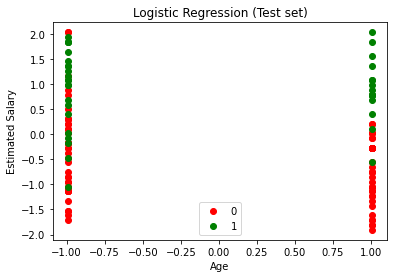

In [27]:
for i, j in enumerate(np.unique(y_test)):
    plt.scatter(X_test[y_test == j, 0], X_test[y_test == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [28]:
#evaluation of model
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

mae=mean_absolute_error(y_true=y_test,y_pred=y_pred)
print(f"mean absolute error: {mae}")

mse=mean_squared_error(y_true=y_test,y_pred=y_pred)
print(f"mean Squared error: {mse}")

r2=r2_score(y_true=y_test,y_pred=y_pred)
print(f"mean Squared error: {mse}")

accuracy=accuracy_score(y_true=y_test,y_pred=y_pred)
print(f"Accuracy: {accuracy}")

mean absolute error: 0.125
mean Squared error: 0.125
mean Squared error: 0.125
Accuracy: 0.875


In [29]:
#predicting the Purchased status with individual value or we can add new values to the array
y_pred2=classifier.predict(X_test[6].reshape(1,3))[0]
y_pred2

1

In [30]:
#prediction with new value
y_pred3=classifier.predict(pd.array([1.00564565,  0.84544845,  0.45615848]).reshape(1,3))
y_pred3

array([1], dtype=int64)